In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:

training_set = tf.keras.utils.image_dataset_from_directory(
    'train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 921 files belonging to 4 classes.


In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 38 files belonging to 4 classes.


In [27]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     

In [29]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Dropout(0.25))
     

In [32]:
cnn.add(tf.keras.layers.Flatten())   

In [33]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [34]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))     

In [35]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [36]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

Compiling and Training Phase

In [37]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,620,964 (25.26 MB)

 Trainable params: 6,620,964 (25.26 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=100)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.2953 - loss: 37.9109 - val_accuracy: 0.2368 - val_loss: 1.3785
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.4154 - loss: 1.2626 - val_accuracy: 0.2105 - val_loss: 1.3896
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.2690 - loss: 1.3868 - val_accuracy: 0.2632 - val_loss: 1.3785
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.2556 - loss: 1.3808 - val_accuracy: 0.2105 - val_loss: 1.3777
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.3013 - loss: 1.3693 - val_accuracy: 0.2895 - val_loss: 1.4274
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.2852 - loss: 1.3698 - val_accuracy: 0.2632 - val_loss: 1.3648
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.3108 - loss: 1.3547 - val_accuracy: 0.3684 - val_loss: 1.3858
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.3131 - loss: 1.3296 - val_acc

In [40]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9769 - loss: 0.0941
Training accuracy: 0.978284478187561


In [41]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6573 - loss: 3.9291 
Validation accuracy: 0.6578947305679321


In [42]:
cnn.save('trained_model_epoch100.h5')

In [43]:
training_history.history #Return Dictionary of history

{'accuracy': [0.2964169383049011,
  0.36699241399765015,
  0.27361562848091125,
  0.2551574409008026,
  0.3072746992111206,
  0.30184581875801086,
  0.33984798192977905,
  0.35287731885910034,
  0.4386536478996277,
  0.47448426485061646,
  0.4896851181983948,
  0.5081433057785034,
  0.5276873111724854,
  0.546145498752594,
  0.5537459254264832,
  0.5439739227294922,
  0.5993485450744629,
  0.5928338766098022,
  0.6297502517700195,
  0.628664493560791,
  0.6351791620254517,
  0.6373506784439087,
  0.6460369229316711,
  0.7035830616950989,
  0.6970683932304382,
  0.7459283471107483,
  0.7339848279953003,
  0.7524430155754089,
  0.7719869613647461,
  0.7567861080169678,
  0.7861020565032959,
  0.8241042494773865,
  0.8273615837097168,
  0.8414766788482666,
  0.7871878147125244,
  0.8002171516418457,
  0.8403908610343933,
  0.8577632904052734,
  0.8642779588699341,
  0.8577632904052734,
  0.8707926273345947,
  0.8697068691253662,
  0.8838219046592712,
  0.895765483379364,
  0.9261671900749

In [44]:
#Recording History in json
import json
with open('training_hist100.json','w') as f:
  json.dump(training_history.history,f)

In [45]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [46]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 65.78947305679321 %


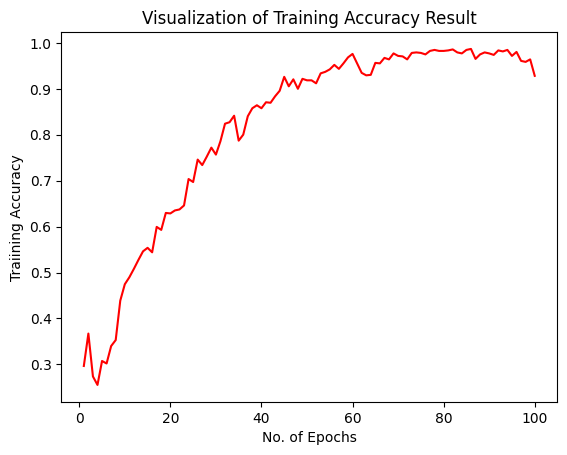

In [48]:
# Training Graph
epochs = [i for i in range(1,101)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

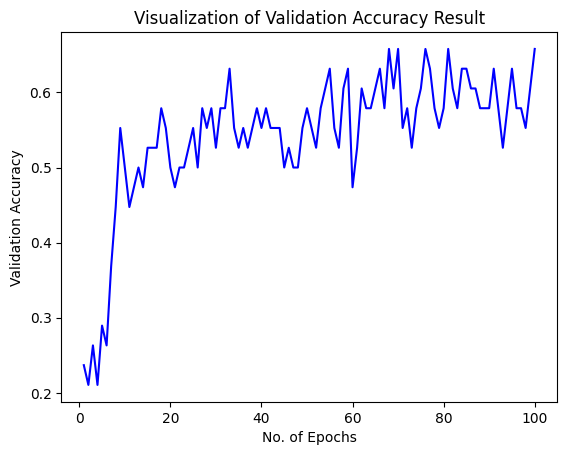

In [49]:
# Validation Accuracy

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
# Test dataset evaluation
test_set = tf.keras.utils.image_dataset_from_directory(
    'test/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 397 files belonging to 4 classes.


In [1]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

NameError: name 'cnn' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = []
y_true = []

for images, labels in test_set:
    predictions = cnn.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the classification report
print(classification_report(y_true, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
